In [1]:
%matplotlib inline
from IPython.display import Image
import pandas as pd
import numpy as np                
import matplotlib.pyplot as plt 

# Python for Data Analysis

**Written for the North American Econometric Society Summer Meeting, June 2016¶**

**Author:** Matthew McKay

One of the biggest selling points of **Python** is how easy it is to work with data. 

The **Python** ecosystem includes many useful packages to quickly work with data in a very agile way. 

**References:**
1. http://pandas.pydata.org/pandas-docs/stable/dsintro.html
1. http://quant-econ.net/py/pandas.html
1. http://pandas.pydata.org/pandas-docs/stable/10min.html
1. http://pandas.pydata.org/pandas-docs/stable/tutorials.html

**For Interested Participants** 

An excellent resource is the book *"Python for Data Analysis"*, by Wes McKinney

## Table of Contents:

1. The `pd.Series` and `pd.DataFrame` objects
   
    1. Basic idea
    1. Associated Methods
    
1. Working with Special Types of Data

    1. Time Series

1. Applications

    1. Chicago Federal Reserve Data (CFNAI)
    1. International Export Data
    1. Web Data
    
 

================================================================================================================================================

## Demo

#### Random Values

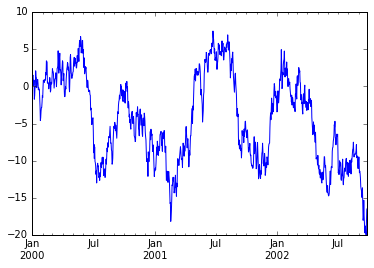

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('2000/1/1', periods=1000))
ts = ts.cumsum()
ts.plot()

In [3]:
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2002-09-17', '2002-09-18', '2002-09-19', '2002-09-20',
               '2002-09-21', '2002-09-22', '2002-09-23', '2002-09-24',
               '2002-09-25', '2002-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

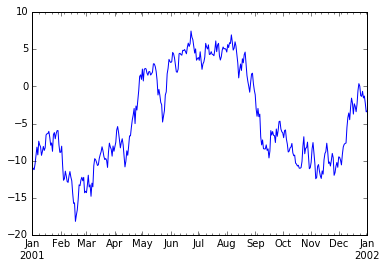

In [4]:
#-Select a Date Range-#
date_range = pd.date_range(start='2001/1/1', end='2002/1/1')
ts[date_range].plot()

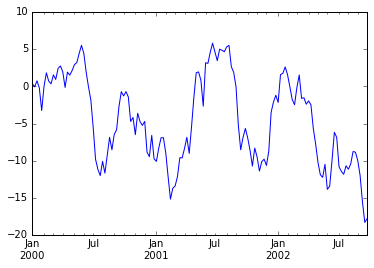

In [5]:
#-Weekly Means-#
ts.resample('W').mean().plot()

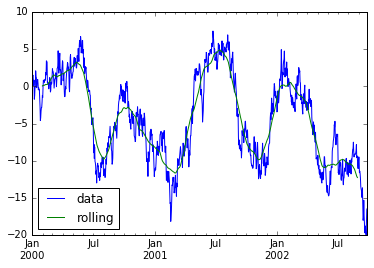

In [6]:
#-Rolling Means-#
r = ts.rolling(window=60, center=True).mean()
df = pd.DataFrame({'data' : ts, 'rolling' : r})
df.plot()

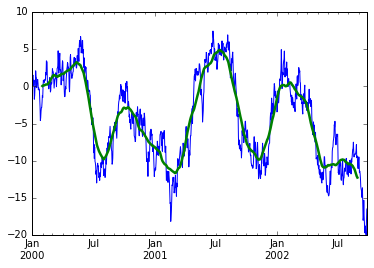

In [7]:
#-You can have a high degree of control using pandas and matplotlib together-#
styles = ['b-', 'g-']
linewidths = [1,2.5]
fig, ax = plt.subplots()
for col, style, lw in zip(df.columns, styles, linewidths):
    df[col].plot(style=style, lw=lw, ax=ax)

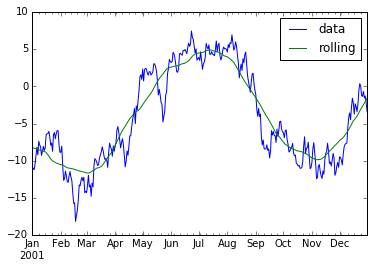

In [8]:
#-Zoom in to the Year 2001-#
df.ix['2001'].plot()                            

#### Chicago Fed CFNAI Data

https://www.chicagofed.org/research/data/cfnai/current-data

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm

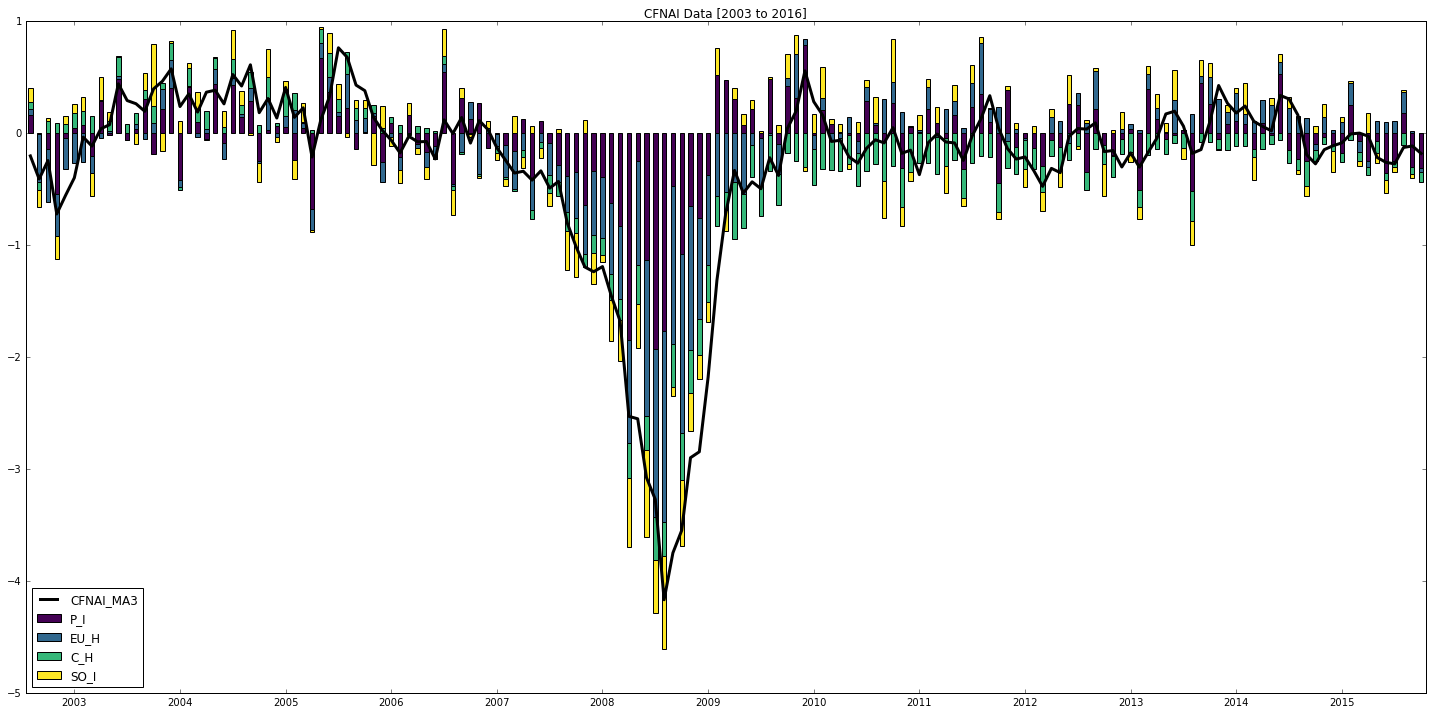

In [10]:
df = pd.read_excel("./cfnai-data-series-xlsx.xlsx")
df.index = df.index.str.split(":", expand=True)
df.index.names = ["year","month"]
df.reset_index(inplace=True)

#-Add a Day Column to use pd.to_datetime converter function-#
df['day'] = 1
df.index = pd.to_datetime(df[['year','month', 'day']])
df.drop(['year','month','day'], axis=1, inplace=True)    #Data encoded as datetime so no longer required

#-Produce Composite Chart-#
fig = plt.figure(figsize=(20, 10))
ax = fig.gca()
data = df.ix['2003':'2016']
data[['CFNAI_MA3']].plot(ax=ax, color="black", linewidth=3, use_index=False)
data[['P_I', 'EU_H', 'C_H', 'SO_I']].plot(ax=ax, kind='bar', stacked=True, colormap=cm.viridis, use_index=False)
ax.set_title("CFNAI Data [2003 to 2016]");

#-Construct a Custom Index (Current Bug in Pandas)-#
mask = []
for idx,month in enumerate(data.index.month):
    if month == 6:
        mask.append(idx)
years = pd.Series(data.index.year).unique() 
ax.set_xticks(mask);
ax.set_xticklabels(years, horizontalalignment='center');
plt.xticks(rotation=0);
plt.tight_layout();

#### FRED Data 

Consumer Price Index for All Urban Consumers: All Items

https://research.stlouisfed.org/fred2/series/CPIAUCSL

Consumer Price Index for All Urban Consumers: All Items Less Food and Energy

https://research.stlouisfed.org/fred2/series/CPILFESL



In [11]:
import pandas_datareader.data as web

In [12]:
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)
inflation = web.DataReader(["CPIAUCSL", "CPILFESL"], "fred", start, end) 

In [13]:
inflation.head()

,CPIAUCSL,CPILFESL
DATE,,
2010-01-01,217.488,220.633
2010-02-01,217.281,220.731
2010-03-01,217.353,220.783
2010-04-01,217.403,220.822
2010-05-01,217.290,220.962


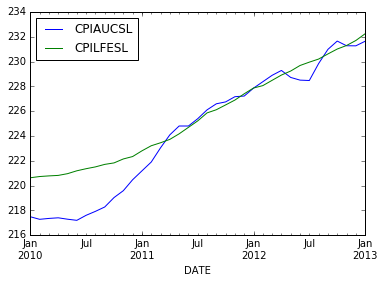

In [14]:
inflation.plot()

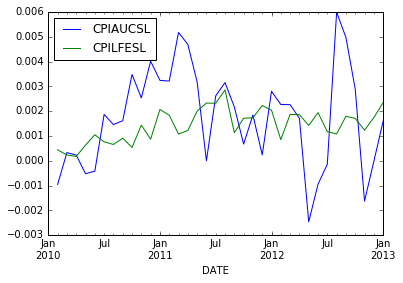

In [15]:
#-Plot the Percentage Change-#
inflation.pct_change().plot()

======================================================================================================================

## Series and DataFrame Objects

Many of the following examples are taken from the excellent Pandas Documentation: http://pandas.pydata.org/pandas-docs/stable/dsintro.html

The two **primary** data objects in Pandas are:

1. Series
2. DataFrames

DataFrames can be thought of as a collection of Series. Selecting a column in a DataFrame will return a Series Object.

The **key** thing to keep in mind:

> data alignment is intrinsic. The link between labels and data will not be broken unless done so explicitly by you.

----------------------------___

### Series

**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index which can include Index or MultiIndex objects

```
s = pd.Series(data, index=index)
```

data can take many different forms (i.e. dict, ndarray, lists, scalar etc). 

#### From Numpy Arrays

In [16]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [17]:
type(s)

pandas.core.series.Series

In [18]:
s

a    0.054104
b   -0.080397
c    0.346864
d    0.170342
e   -0.781801
dtype: float64

In [19]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [20]:
#-No Index Specified then will default to a numeric index-#
s = pd.Series(np.random.randn(5))

In [21]:
s

0    0.388693
1   -1.022004
2    1.738881
3    0.014947
4   -1.095027
dtype: float64

#### From Dictionaries

In [22]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [23]:
#-Data Alignment is Intrinsic!-#
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

#### Series Objects are Similar to Array Behaviour

In [24]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [25]:
s

a    0.115045
b    0.244631
c   -1.071044
d    0.468656
e    1.830989
dtype: float64

In [26]:
s[0]

0.11504473074138345

In [27]:
s[1:3]

b    0.244631
c   -1.071044
dtype: float64

In [28]:
s[s > s.median()]

d    0.468656
e    1.830989
dtype: float64

In [29]:
s[[3,2,1]]

d    0.468656
c   -1.071044
b    0.244631
dtype: float64

**Typically** pd.Series objects are very flexible

In [30]:
np.sum(s)

1.5882766656587914

In [31]:
s.sum()

1.5882766656587914

#### Indexing via the index can be done through the `ix` operator (or `loc` and `iloc` operator) (more important for DataFrames)

In [32]:
s.ix[['d','e']]

d    0.468656
e    1.830989
dtype: float64

**but** becuase they are Series Objects we can also use them like dictionaries to get access to the data. **Don't** confuse this with DataFrame Objects where this syntax works on column labels

In [33]:
s[['d','e']]

d    0.468656
e    1.830989
dtype: float64

#### Operations on Series Objects

In [34]:
s + s

a    0.230089
b    0.489262
c   -2.142089
d    0.937312
e    3.661978
dtype: float64

In [35]:
s * 2

a    0.230089
b    0.489262
c   -2.142089
d    0.937312
e    3.661978
dtype: float64

In [36]:
np.sqrt(s)

a    0.339182
b    0.494602
c         NaN
d    0.684585
e    1.353141
dtype: float64

A **key** difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [37]:
s[2:]                  #No A,B

c   -1.071044
d    0.468656
e    1.830989
dtype: float64

In [38]:
s[:-2]                  #No D,E

a    0.115045
b    0.244631
c   -1.071044
dtype: float64

In [39]:
s[2:] + s[:-2]         #Intrinsic Alignment, Union of Index Values

a         NaN
b         NaN
c   -2.142089
d         NaN
e         NaN
dtype: float64

#### Useful Built In Methods

In [40]:
s.describe()

count    5.000000
mean     0.317655
std      1.035356
min     -1.071044
25%      0.115045
50%      0.244631
75%      0.468656
max      1.830989
dtype: float64

-----------------------------------------------------------------------

### DataFrame

Reference: http://pandas.pydata.org/pandas-docs/stable/dsintro.html#DataFrame

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. **It is generally the most commonly used pandas object**. Like Series, DataFrame accepts many different kinds of input:

1. Dict of 1D ndarrays, lists, dicts, or Series
1. 2-D numpy.ndarray
1. Structured or record ndarray
1. A Series
1. Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments.

**Note:** DataFrames have become a standard in the Python ecosystem and can be used with a lot of packages such as **statsmodels**, **scikit-learn** ...

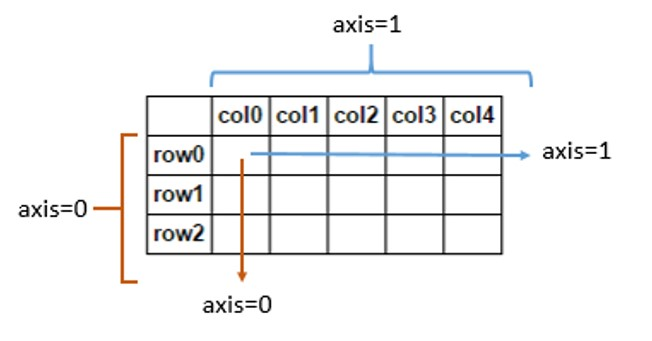

In [41]:
Image(filename='dataframe.jpg')          #TODO: Replace with Own Diagram

In [42]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)

In [43]:
df          #-Automatic Alignment of Series based on Index-#

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [44]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [45]:
df.columns

Index(['one', 'two'], dtype='object')

#### Accessing Columns

In [46]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [47]:
type(df['one'])

pandas.core.series.Series

#### Accessing Rows

In [48]:
df.ix['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [49]:
type(df.ix['b'])

pandas.core.series.Series

#### Adding Columns

In [50]:
df['three'] = df['one'] + df['two']

In [51]:
df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


#### Selecting Multiple Columns

In [52]:
df[['one','three']]

,one,three
a,1.0,2.0
b,2.0,4.0
c,3.0,6.0
d,NaN,NaN


#### Selecting Multiple Rows

In [53]:
df.ix[['b','c']]

,one,two,three
b,2.0,2.0,4.0
c,3.0,3.0,6.0


In [54]:
df.loc[['b','c']]  #Just Label Based

,one,two,three
b,2.0,2.0,4.0
c,3.0,3.0,6.0


In [55]:
df.iloc[[1,2]]    #Just Integer Based

,one,two,three
b,2.0,2.0,4.0
c,3.0,3.0,6.0


#### Inserting Scalars

In [56]:
df['four'] = "What"   #Broadcasts and fills the Column

In [57]:
df

,one,two,three,four
a,1.0,1.0,2.0,What
b,2.0,2.0,4.0,What
c,3.0,3.0,6.0,What
d,NaN,4.0,NaN,What


#### Deleting a Column

In [58]:
del df['four']

In [59]:
df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


#### Transposing

In [60]:
df.T

,a,b,c,d
one,1.0,2.0,3.0,NaN
two,1.0,2.0,3.0,4.0
three,2.0,4.0,6.0,NaN


In [61]:
df.transpose()

,a,b,c,d
one,1.0,2.0,3.0,NaN
two,1.0,2.0,3.0,4.0
three,2.0,4.0,6.0,NaN


In [62]:
df              #Note: The underlying object hasn't changed due to no assignment

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


## Index Objects and Reshaping

In [63]:
df = pd.DataFrame({ 'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})

In [64]:
df

,A,B,C,D,E
0,one,A,foo,-0.064840,2.214628
1,one,B,foo,1.364687,1.051297
2,two,C,foo,0.279253,1.561083
3,three,A,bar,-0.691140,0.003626
4,one,B,bar,0.874432,0.460332
5,one,C,bar,-1.023678,-0.844966
6,two,A,foo,2.287404,0.179471
7,three,B,foo,-1.468907,-2.454352
8,one,C,foo,0.524643,0.612557
9,one,A,bar,-0.831953,-0.676289


In [65]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.831953 -0.064840
      B  0.874432  1.364687
      C -1.023678  0.524643
three A -0.691140       NaN
      B       NaN -1.468907
      C -1.407505       NaN
two   A       NaN  2.287404
      B  0.016157       NaN
      C       NaN  0.279253

**Using MultiIndex** to reorganize the information in a DataFrame

In [66]:
dfi = df.set_index(['A','B','C'])

In [67]:
dfi

D         E
A     B C                      
one   A foo -0.064840  2.214628
      B foo  1.364687  1.051297
two   C foo  0.279253  1.561083
three A bar -0.691140  0.003626
one   B bar  0.874432  0.460332
      C bar -1.023678 -0.844966
two   A foo  2.287404  0.179471
three B foo -1.468907 -2.454352
one   C foo  0.524643  0.612557
      A bar -0.831953 -0.676289
two   B bar  0.016157 -0.205799
three C bar -1.407505  1.496189

In [68]:
dfi.unstack(level='C')

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -0.831953 -0.064840 -0.676289  2.214628
      B  0.874432  1.364687  0.460332  1.051297
      C -1.023678  0.524643 -0.844966  0.612557
three A -0.691140       NaN  0.003626       NaN
      B       NaN -1.468907       NaN -2.454352
      C -1.407505       NaN  1.496189       NaN
two   A       NaN  2.287404       NaN  0.179471
      B  0.016157       NaN -0.205799       NaN
      C       NaN  0.279253       NaN  1.561083

In [69]:
dfi['D'].unstack(level='C')         #Same as the pivot table result

C             bar       foo
A     B                    
one   A -0.831953 -0.064840
      B  0.874432  1.364687
      C -1.023678  0.524643
three A -0.691140       NaN
      B       NaN -1.468907
      C -1.407505       NaN
two   A       NaN  2.287404
      B  0.016157       NaN
      C       NaN  0.279253

#### Comparison of DataFrame Objects

In [70]:
#-Compare-#
df1 = dfi['D'].unstack(level='C')
df2 = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

In [71]:
df1.equals(df2)

True

In [72]:
df1 == df2                #This performs element-by-element wise

C          bar    foo
A     B              
one   A   True   True
      B   True   True
      C   True   True
three A   True  False
      B  False   True
      C   True  False
two   A  False   True
      B   True  False
      C  False   True

In [73]:
df1           #Note: The above result has difficulty comparing NaN values

C             bar       foo
A     B                    
one   A -0.831953 -0.064840
      B  0.874432  1.364687
      C -1.023678  0.524643
three A -0.691140       NaN
      B       NaN -1.468907
      C -1.407505       NaN
two   A       NaN  2.287404
      B  0.016157       NaN
      C       NaN  0.279253

In [74]:
df2

C             bar       foo
A     B                    
one   A -0.831953 -0.064840
      B  0.874432  1.364687
      C -1.023678  0.524643
three A -0.691140       NaN
      B       NaN -1.468907
      C -1.407505       NaN
two   A       NaN  2.287404
      B  0.016157       NaN
      C       NaN  0.279253

## Sorting

In [75]:
s = pd.Series(range(4), index=['d','a','b','c'])

In [76]:
s

d    0
a    1
b    2
c    3
dtype: int64

In [77]:
s.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [78]:
df = pd.DataFrame(np.arange(8).reshape((2,4)), index=['three','one'], columns=['d','a','b','c'])

In [79]:
df

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [80]:
df.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [81]:
df.sort_index(axis=1)        #Columns

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [82]:
#-Sort by Values-#
df.sort_values(by='a')

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


#### Chain Operations Together

In [83]:
df.sort_index(axis=1).sort_values(by='a', ascending=False)

,a,b,c,d
one,5,6,7,4
three,1,2,3,0


**Note:** Using a MultiIndex you can also sort by different **levels** in the index

### Ranking

In [84]:
df = df.T

In [85]:
df

,three,one
d,0,4
a,1,5
b,2,6
c,3,7


In [86]:
df.rank()

,three,one
d,1.0,1.0
a,2.0,2.0
b,3.0,3.0
c,4.0,4.0


-----------------------------------------------------------------------

## Split-Apply-Combine

DataFrames also support more advanced operations such as **groupby**  which can be very powerful when aggregating data based on groups and performing some operations over them

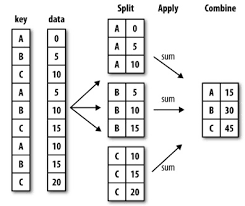

In [87]:
Image(filename='split-apply-combine.png')

In [88]:
key = ['A','B','C','A','B','C','A','B','C']
data = [0,5,10,5,10,15,10,15,20]
df = pd.DataFrame(data, index=key, columns=['data'])

In [89]:
df

,data
A,0
B,5
C,10
A,5
B,10
C,15
A,10
B,15
C,20


In [90]:
#-Groupby Index Level-#
df.groupby(level=0).sum()

,data
A,15
B,30
C,45


In [91]:
df = df.reset_index()
df.columns=["key","data"]
df.groupby(by=["key"]).sum()

,data
key,
A,15
B,30
C,45


======================================================================================================================

## Working with Special Types of Data

**Pandas** has a support for different types of data such as:

1. Time Series
1. Categoricals (very recently)

Reference: http://pandas.pydata.org/pandas-docs/stable/10min.html

In [92]:
rng = pd.date_range('1/1/2012', periods=200, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [93]:
ts.head()

2012-01-01 00:00:00    444
2012-01-01 00:00:01    180
2012-01-01 00:00:02    385
2012-01-01 00:00:03    123
2012-01-01 00:00:04    256
Freq: S, dtype: int64

In [94]:
ts.tail()

2012-01-01 00:03:15    297
2012-01-01 00:03:16    318
2012-01-01 00:03:17    394
2012-01-01 00:03:18     95
2012-01-01 00:03:19    226
Freq: S, dtype: int64

#### Resampling the Time Series

In [95]:
ts.resample('1Min').mean()

2012-01-01 00:00:00    227.916667
2012-01-01 00:01:00    274.450000
2012-01-01 00:02:00    248.216667
2012-01-01 00:03:00    254.300000
Freq: T, dtype: float64

In [96]:
ts.resample('1Min').sum()   #TODO: Update

2012-01-01 00:00:00    13675
2012-01-01 00:01:00    16467
2012-01-01 00:02:00    14893
2012-01-01 00:03:00     5086
Freq: T, dtype: int64

#### Working with Time Series Data

**See:** pandas-explore-fred-data.ipynb as an example of working with real world data

Let's work with some random generated data)

In [97]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/1990', periods=1000))

In [98]:
s.head()

1990-01-01    0.513644
1990-01-02    0.775152
1990-01-03   -2.145695
1990-01-04    0.275764
1990-01-05    1.185193
Freq: D, dtype: float64

In [99]:
s.tail()

1992-09-22   -0.461876
1992-09-23   -0.631018
1992-09-24   -1.066319
1992-09-25    0.609072
1992-09-26    0.136192
Freq: D, dtype: float64

In [100]:
len(s)

1000

In [101]:
s = s.cumsum()      #Generate a cumulative sum

In [102]:
#-Rolling Mean-#
r = s.rolling(window=60, center=True).mean()

In [103]:
data = pd.DataFrame({'s' : s, 'r' : r})

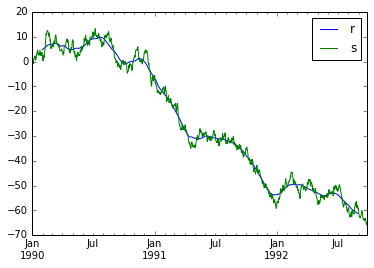

In [104]:
data.plot()

====================================================================================================================

# Applications

# Example \#1: CFNAI Data

Replicating the following graph using Pandas

1. Working with Hierarchical Data
1. Working with datetime objects

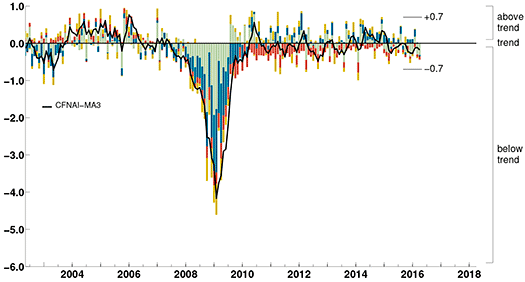

In [105]:
Image("./cfnai-monthly-ma3-png.png")

In [106]:
#-Read the Data-#
df = pd.read_excel("./cfnai-data-series-xlsx.xlsx")

In [107]:
df.head()

,P_I,EU_H,C_H,SO_I,CFNAI,CFNAI_MA3,DIFFUSION
1967:03,-0.369880,-0.062517,-0.036264,-0.021383,-0.490010,NaN,NaN
1967:04,0.223156,-0.243228,-0.008409,-0.114427,-0.142874,NaN,NaN
1967:05,-0.611894,0.111490,-0.057219,-0.103701,-0.661290,-0.431391,-0.217897
1967:06,-0.150152,0.102446,0.071709,-0.034229,-0.010192,-0.271452,-0.199257
1967:07,-0.283465,0.193661,-0.066431,-0.186489,-0.342690,-0.338057,-0.247779


In [108]:
#-Check how the Data is Indexed-#
df.index

Index(['1967:03', '1967:04', '1967:05', '1967:06', '1967:07', '1967:08',
       '1967:09', '1967:10', '1967:11', '1967:12',
       ...
       '2015:06', '2015:07', '2015:08', '2015:09', '2015:10', '2015:11',
       '2015:12', '2016:01', '2016:02', '2016:03'],
      dtype='object', length=589)

In [109]:
#-Split each string and expand into a multicolumn object-#
df.index = df.index.str.split(":", expand=True)

In [110]:
#-Levels are now in Years and Months-#
df.index.levels

FrozenList([['1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'], ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']])

In [111]:
#-Convert Each string in each Level to an Integer-#
df.index.set_levels(df.index.levels[0].map(lambda x: int(x)), level=0, inplace=True)
df.index.set_levels(df.index.levels[1].map(lambda x: int(x)), level=1, inplace=True)

In [112]:
#-Rename each Index-#
df.index.names = ["year","month"]

In [113]:
df.head()

P_I      EU_H       C_H      SO_I     CFNAI  CFNAI_MA3  \
year month                                                                
1967 3     -0.369880 -0.062517 -0.036264 -0.021383 -0.490010        NaN   
     4      0.223156 -0.243228 -0.008409 -0.114427 -0.142874        NaN   
     5     -0.611894  0.111490 -0.057219 -0.103701 -0.661290  -0.431391   
     6     -0.150152  0.102446  0.071709 -0.034229 -0.010192  -0.271452   
     7     -0.283465  0.193661 -0.066431 -0.186489 -0.342690  -0.338057   

            DIFFUSION  
year month             
1967 3            NaN  
     4            NaN  
     5      -0.217897  
     6      -0.199257  
     7      -0.247779

### Using Datetime Objects

It can often be convenient to express dates using datetime objects.

  * Aware of months and days
  * Aware of time
  * Tested and reliable when computing differences in time etc. 

In [114]:
#-Reimport the Data, Split the Specially Formatted Index and name then year, month
df = pd.read_excel("./cfnai-data-series-xlsx.xlsx")
df.index = df.index.str.split(":", expand=True)
df.index.names = ["year","month"]
df.reset_index(inplace=True)

In [115]:
df.head()

,year,month,P_I,EU_H,C_H,SO_I,CFNAI,CFNAI_MA3,DIFFUSION
0,1967,03,-0.369880,-0.062517,-0.036264,-0.021383,-0.490010,NaN,NaN
1,1967,04,0.223156,-0.243228,-0.008409,-0.114427,-0.142874,NaN,NaN
2,1967,05,-0.611894,0.111490,-0.057219,-0.103701,-0.661290,-0.431391,-0.217897
3,1967,06,-0.150152,0.102446,0.071709,-0.034229,-0.010192,-0.271452,-0.199257
4,1967,07,-0.283465,0.193661,-0.066431,-0.186489,-0.342690,-0.338057,-0.247779


In [116]:
#-Add a Day Column to use pd.to_datetime converter function-#
df['day'] = 1
df.index = pd.to_datetime(df[['year','month', 'day']])
df.drop(['year','month','day'], axis=1, inplace=True)    #Data encoded as datetime so no longer required

In [117]:
df.index

DatetimeIndex(['1967-03-01', '1967-04-01', '1967-05-01', '1967-06-01',
               '1967-07-01', '1967-08-01', '1967-09-01', '1967-10-01',
               '1967-11-01', '1967-12-01',
               ...
               '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01'],
              dtype='datetime64[ns]', length=589, freq=None)

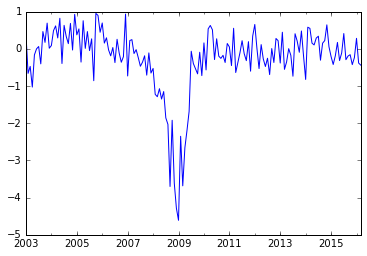

In [118]:
#-Taking a time slice with reference to Year (Year-Month-Day)
df.ix['2003':'2018']['CFNAI'].plot()

In [119]:
#-Look at a subset of the data in terms of Index (Time) and Columns that make up the stacked bar chart-#
df.ix['2003':'2018'][['P_I', 'EU_H', 'C_H', 'SO_I']].head()

,P_I,EU_H,C_H,SO_I
2003-01-01,0.161773,0.059513,0.062086,0.119393
2003-02-01,-0.008320,-0.431139,-0.066996,-0.154053
2003-03-01,-0.137302,-0.476053,0.114220,0.025863
2003-04-01,-0.539615,-0.374927,0.092435,-0.206530
2003-05-01,-0.042670,-0.277445,0.084537,0.072942


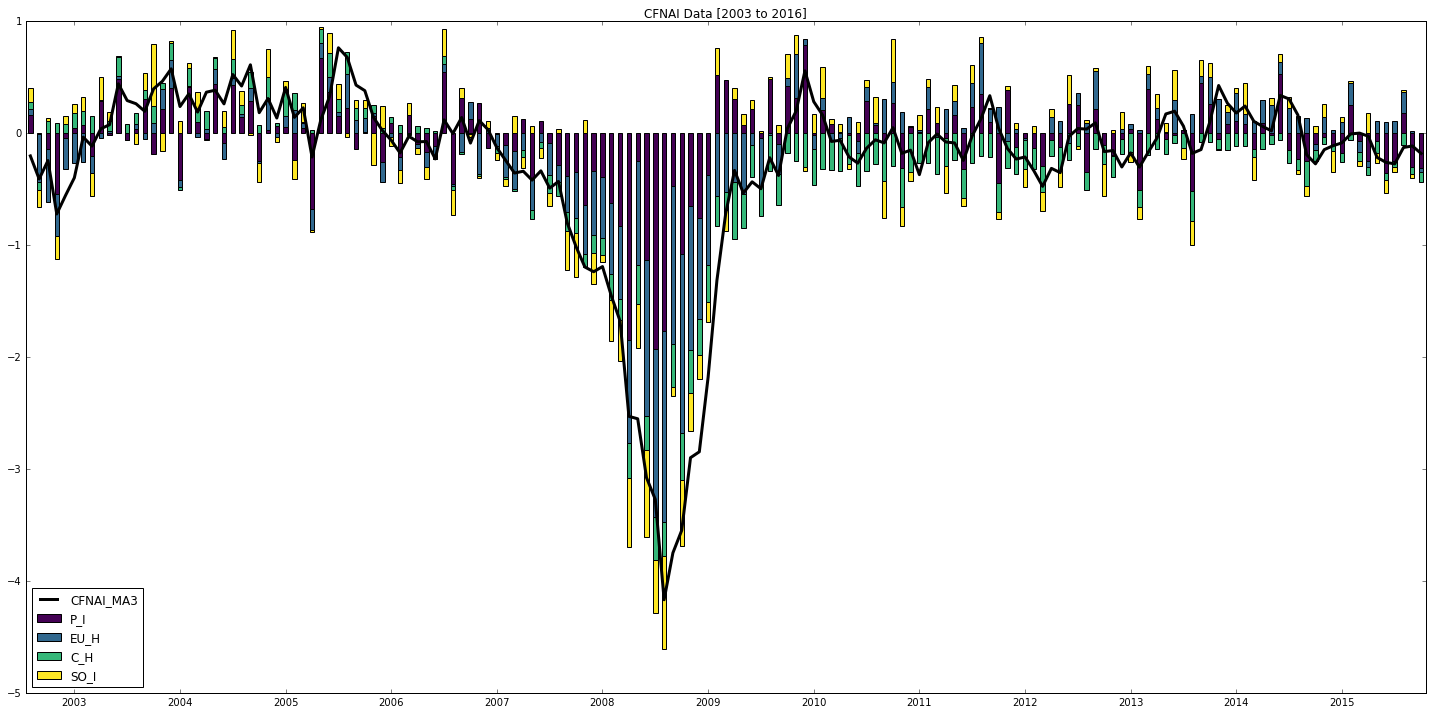

In [120]:
#-Produce Composite Chart-#
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(20, 10))
ax = fig.gca()
data = df.ix['2003':'2016']
data[['CFNAI_MA3']].plot(ax=ax, color="black", linewidth=3, use_index=False)
data[['P_I', 'EU_H', 'C_H', 'SO_I']].plot(ax=ax, kind='bar', stacked=True, colormap=cm.viridis, use_index=False)
ax.set_title("CFNAI Data [2003 to 2016]");

#-Construct a Custom Index (Current Bug in Pandas)-#
mask = []
for idx,month in enumerate(data.index.month):
    if month == 6:
        mask.append(idx)
years = pd.Series(data.index.year).unique() 
ax.set_xticks(mask);
ax.set_xticklabels(years, horizontalalignment='center');
plt.xticks(rotation=0);
plt.tight_layout();

### Interactive Graph Generation Using Widgets

In [121]:
pd.Series(df.index.year).unique()

array([1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016])

In [122]:
import ipywidgets as widgets
from ipywidgets import interact

years = [str(i) for i in range(1967, 2016+1)]

start = widgets.Dropdown(
    options=[str(i) for i in range(1967, 2016+1)],
    value='2003',
    description='Start Year:',
)

end = widgets.Dropdown(
    options=[str(i) for i in range(1967, 2016+1)],
    value='2016',
    description='End Year:',
)


In [123]:
def plot_composite(start, end):
    fig = plt.figure(figsize=(20, 10))
    ax = fig.gca()
    data = df.ix[start:end]
    data[['CFNAI_MA3']].plot(ax=ax, color="black", linewidth=3, use_index=False)
    data[['P_I', 'EU_H', 'C_H', 'SO_I']].plot(ax=ax, kind='bar', stacked=True, colormap=cm.viridis, use_index=False)
    ax.set_title("CFNAI Data [%s to %s]"%(start,end));

    #-Construct a Custom Index (Current Bug in Pandas)-#
    mask = []
    for idx,month in enumerate(data.index.month):
        if month == 6:
            mask.append(idx)
    years = pd.Series(data.index.year).unique() 
    ax.set_xticks(mask);
    ax.set_xticklabels(years, horizontalalignment='center');
    plt.xticks(rotation=0);
    plt.tight_layout();

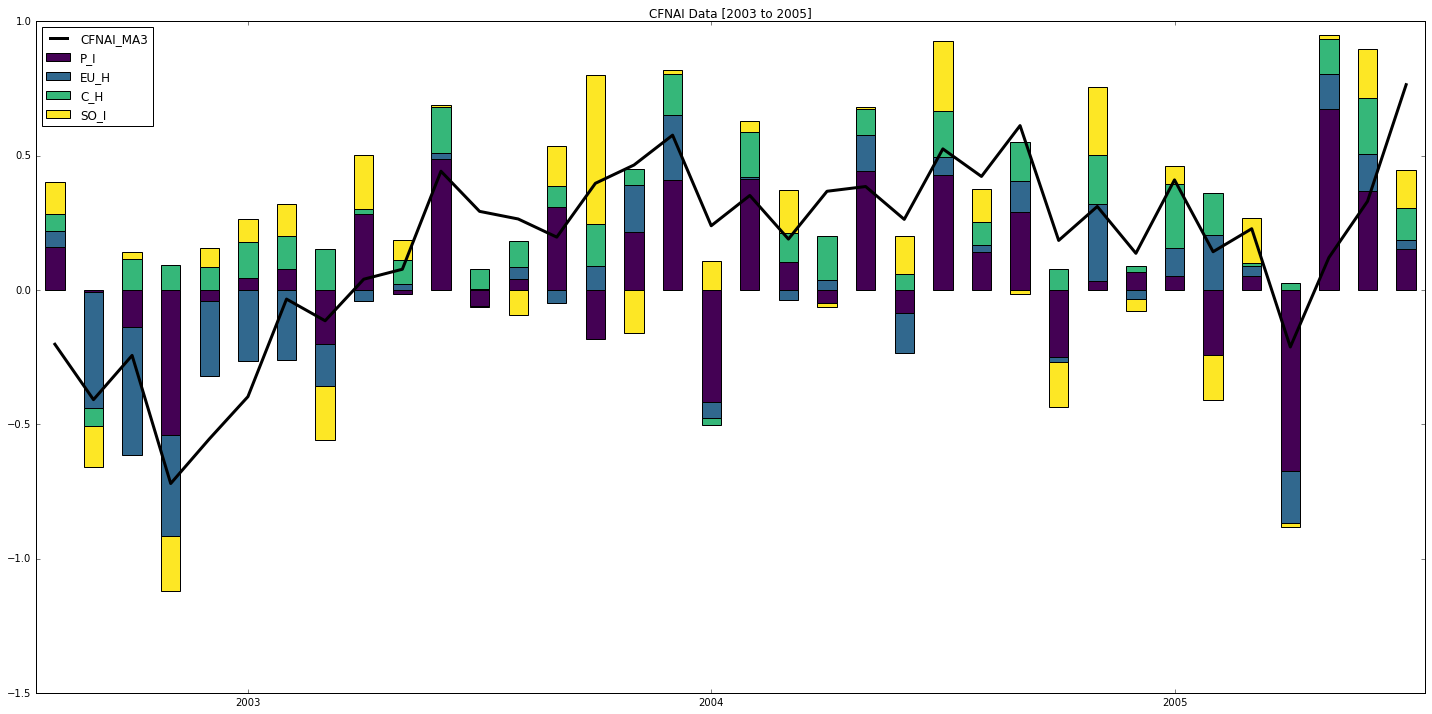

In [124]:
interact(plot_composite, start=start, end=end)

=======================================================================================================================

## Medium Sized DataSets (International Trade)

Some problems start to become large and may demand working with more sophisticated tools such as **pandas**. Very large problems require data management tools such as SQL, NoSQL, and Graph based Datasets; but a large number of problems are in between: not small enough for Excel and manual manipulation, but annoyingly small to have to learn database management. **Pandas** sits in this space nicely as a spreadsheet type abstraction that is scalable. 

Pandas is focused on **in-memory** datasets (i.e. datasets that can fit into RAM)

Let's consider Product Level International Exports data for the world economy.

**Files Required:**
Go to http://atlas.media.mit.edu/en/resources/data/ and download
1. SITC4 Rev. 2 (1962 to 2013) - "Product Trade between Origin and Destination Country by Year (bilateral)"
2. "Country Names"
3. "SITC Revision 2 Product Names"


In [125]:
export = "data/year_origin_sitc_rev2.tsv"
cname = "data/country_names.tsv"
pname = "data/products_sitc_rev2.tsv"

In [126]:
export = pd.read_csv(export, sep='\t')
cname = pd.read_csv(cname, sep='\t')
pname = pd.read_csv(pname, sep='\t')

#### Let's take look at the data

In [127]:
export.head()

,year,origin,sitc_rev2,export_val,import_val,export_rca,import_rca
0,1962,afg,230,4000.0,2000.0,0.013854,NaN
1,1962,afg,250,66000.0,0.0,0.384611,NaN
2,1962,afg,540,74000.0,0.0,2.358660,NaN
3,1962,afg,545,17000.0,0.0,0.074049,NaN
4,1962,afg,548,33000.0,0.0,0.691940,NaN


In [128]:
cname.head()

,id,id_3char,name
0,afago,ago,Angola
1,afbdi,bdi,Burundi
2,afben,ben,Benin
3,afbfa,bfa,Burkina Faso
4,afbwa,bwa,Botswana


In [129]:
pname.head()

,id,sitc,name
0,105722,5722,Initiating Devices
1,105838,5838,Polymerization Ion Exchangers
2,106250,6250,"Rubber tires, tire cases, inner and flaps, for..."
3,106251,6251,Car Tires
4,106280,6280,Other articles of rubber


In [130]:
#-Memory Usage-#
export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002928 entries, 0 to 5002927
Data columns (total 7 columns):
year          int64
origin        object
sitc_rev2     int64
export_val    float64
import_val    float64
export_rca    float64
import_rca    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 267.2+ MB


#### Let's Focus on the Export Data

In [131]:
export.head()

,year,origin,sitc_rev2,export_val,import_val,export_rca,import_rca
0,1962,afg,230,4000.0,2000.0,0.013854,NaN
1,1962,afg,250,66000.0,0.0,0.384611,NaN
2,1962,afg,540,74000.0,0.0,2.358660,NaN
3,1962,afg,545,17000.0,0.0,0.074049,NaN
4,1962,afg,548,33000.0,0.0,0.691940,NaN


In [132]:
export.shape

(5002928, 7)

In [133]:
export.describe()

/Users/matthewmckay/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,year,sitc_rev2,export_val,import_val,export_rca,import_rca
count,5.002928e+06,5.002928e+06,4.918819e+06,4.999516e+06,4.918819e+06,3.950609e+06
mean,1.993513e+03,5.548391e+03,4.548178e+07,4.458144e+07,2.593615e+00,1.616125e+00
std,1.311605e+01,2.673359e+03,7.879395e+08,7.787933e+08,8.779551e+01,2.199598e+01
min,1.962000e+03,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.985000e+03,2.929000e+03,NaN,NaN,NaN,NaN
50%,1.995000e+03,6.553000e+03,NaN,NaN,NaN,NaN
75%,2.004000e+03,7.435000e+03,NaN,NaN,NaN,NaN
max,2.013000e+03,9.710000e+03,3.052372e+11,3.366875e+11,8.166420e+04,2.159450e+04


**Warning:** Be careful with how the data is represented when it is imported. SITC revision 2 codes are typically 4 digits long, that incorporate leading zeros. When working with data always take time to inspect your data

In [134]:
export = "data/year_origin_sitc_rev2.tsv"
export = pd.read_csv(export, sep='\t', converters={'sitc_rev2':str})

pname = "data/products_sitc_rev2.tsv"
pname = pd.read_csv(pname, sep='\t', converters={'sitc':str})

In [135]:
export.head()

,year,origin,sitc_rev2,export_val,import_val,export_rca,import_rca
0,1962,afg,0230,4000.0,2000.0,0.013854,NaN
1,1962,afg,0250,66000.0,0.0,0.384611,NaN
2,1962,afg,0540,74000.0,0.0,2.358660,NaN
3,1962,afg,0545,17000.0,0.0,0.074049,NaN
4,1962,afg,0548,33000.0,0.0,0.691940,NaN


In [136]:
export.describe()

/Users/matthewmckay/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,year,export_val,import_val,export_rca,import_rca
count,5.002928e+06,4.918819e+06,4.999516e+06,4.918819e+06,3.950609e+06
mean,1.993513e+03,4.548178e+07,4.458144e+07,2.593615e+00,1.616125e+00
std,1.311605e+01,7.879395e+08,7.787933e+08,8.779551e+01,2.199598e+01
min,1.962000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.985000e+03,NaN,NaN,NaN,NaN
50%,1.995000e+03,NaN,NaN,NaN,NaN
75%,2.004000e+03,NaN,NaN,NaN,NaN
max,2.013000e+03,3.052372e+11,3.366875e+11,8.166420e+04,2.159450e+04


In [137]:
export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002928 entries, 0 to 5002927
Data columns (total 7 columns):
year          int64
origin        object
sitc_rev2     object
export_val    float64
import_val    float64
export_rca    float64
import_rca    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 267.2+ MB


In [138]:
#-Compute Number of Countries-#
export['origin'].drop_duplicates().size

250

In [139]:
#-Compute Number of Years-#
export['year'].drop_duplicates().size

52

In [140]:
#-Compute Number of Products-#
export['sitc_rev2'].drop_duplicates().size

986

### Compute RCA Values

We can use this Data to Compute a Measure of Comparative Advantage for:
1. 250 Countries
1. 52 Years, and
1. 986 Prodoucts


Let's use the standard Balassa definition of Revealed Comparative Advantage (RCA)

$$
RCA_{cpt} =\frac{E_{cpt}}{E_{ct}} / \frac{E_{pt}}{E_t}
$$

**Reference:** Balassa, B. (1965), Trade Liberalisation and Revealed Comparative Advantage, The Manchester School, 33, 99-123.


In [141]:
data = export[["year","origin","sitc_rev2","export_val","export_rca"]]

In [142]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca
0,1962,afg,0230,4000.0,0.013854
1,1962,afg,0250,66000.0,0.384611
2,1962,afg,0540,74000.0,2.358660
3,1962,afg,0545,17000.0,0.074049
4,1962,afg,0548,33000.0,0.691940


In [143]:
cntry_total = data.groupby(by=["year","origin"]).sum()[["export_val"]]
cntry_total.columns=['ctotal']
product_total = data.groupby(by=["year","sitc_rev2"]).sum()[["export_val"]]
product_total.columns=['ptotal']
world_total = data.groupby(by=["year"]).sum()[["export_val"]]
world_total.columns=['wtotal']

In [144]:
cntry_total.head()

ctotal
year origin              
1962 afg     8.613500e+07
     ago     1.194580e+08
     alb     2.688000e+06
     are     2.000000e+03
     arg     1.430519e+09

In [145]:
product_total.head()

ptotal
year sitc_rev2             
1962 0010         1776000.0
     0011       478649000.0
     0012        44891000.0
     0013        67317000.0
     0014        25580000.0

In [146]:
world_total.head()

,wtotal
year,
1962,1.437881e+11
1963,1.588631e+11
1964,1.796778e+11
1965,1.962422e+11
1966,2.167287e+11


In [147]:
data = data.merge(cntry_total.reset_index(), on=["year","origin"])

In [148]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca,ctotal
0,1962,afg,0230,4000.0,0.013854,86135000.0
1,1962,afg,0250,66000.0,0.384611,86135000.0
2,1962,afg,0540,74000.0,2.358660,86135000.0
3,1962,afg,0545,17000.0,0.074049,86135000.0
4,1962,afg,0548,33000.0,0.691940,86135000.0


In [149]:
#-Check what these Operations have Done-#
data[data.origin == 'afg'][["year","origin","ctotal"]].drop_duplicates().head()

,year,origin,ctotal
0,1962,afg,86135000.0
36223,1963,afg,105038000.0
74727,1964,afg,84797000.0
113808,1965,afg,91223000.0
154163,1966,afg,114601000.0


In [150]:
data = data.merge(product_total.reset_index(), on=["year","sitc_rev2"])
data = data.merge(world_total.reset_index(), on=["year"])

In [151]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca,ctotal,ptotal,wtotal
0,1962,afg,0230,4000.0,0.013854,8.613500e+07,438674000.0,1.437881e+11
1,1962,arg,0230,7162000.0,1.493650,1.430519e+09,438674000.0,1.437881e+11
2,1962,aus,0230,66077000.0,9.519820,2.070759e+09,438674000.0,1.437881e+11
3,1962,aut,0230,3071000.0,0.953014,9.613660e+08,438674000.0,1.437881e+11
4,1962,bel,0230,4802000.0,0.348457,4.111319e+09,438674000.0,1.437881e+11


In [152]:
data["computed_rca"] = (data["export_val"]/data["ctotal"])/(data["ptotal"]/data["wtotal"])

In [153]:
data["diff"] = data["export_rca"] - data["computed_rca"]

In [154]:
data.head()

,year,origin,sitc_rev2,export_val,export_rca,ctotal,ptotal,wtotal,computed_rca,diff
0,1962,afg,0230,4000.0,0.013854,8.613500e+07,438674000.0,1.437881e+11,0.015222,-0.001367
1,1962,arg,0230,7162000.0,1.493650,1.430519e+09,438674000.0,1.437881e+11,1.641050,-0.147400
2,1962,aus,0230,66077000.0,9.519820,2.070759e+09,438674000.0,1.437881e+11,10.459280,-0.939460
3,1962,aut,0230,3071000.0,0.953014,9.613660e+08,438674000.0,1.437881e+11,1.047061,-0.094047
4,1962,bel,0230,4802000.0,0.348457,4.111319e+09,438674000.0,1.437881e+11,0.382844,-0.034387


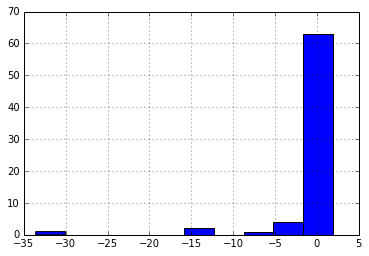

In [155]:
#-Let's check How different the Computed Numbers are for Afghanistan-#
%matplotlib inline
data[(data.year==1962) & (data.origin=="afg")]['diff'].hist()

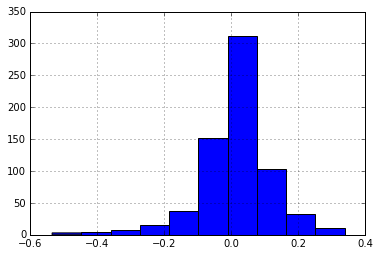

In [156]:
#-USA-#
data[(data.year==1962) & (data.origin=="usa")]['diff'].hist()

====================================================================================================================

## Web Data

Let's consider a practical and everyday type of problem. Say we want to collect some data from a web site that has some embedded tables. Let's make use of the PyPI package index and check out the search results for `economics`.

1. https://pypi.python.org/pypi
2. Search `economics`
3. Check the structure of the web link (https://pypi.python.org/pypi?%3Aaction=search&term=economics&submit=search)

In [157]:
#-Web Data and Web Scraping-#

import pandas as pd
import requests

url = "https://pypi.python.org/pypi?%3Aaction=search&term=economics&submit=search"
page = requests.get(url)

In [158]:
#page.      #-Explore the Object, This is a Representation of a Web Page-#

In [159]:
page.text

'<?xml version="1.0" encoding="utf-8"?>\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n\n  <html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en">\n    <head>\n      \n      <meta content="text/html; charset=utf-8" http-equiv="content-type"/>\n      <title>Index of Packages Matching \'economics\' : Python Package Index</title>\n      <meta content="python programming language object oriented web free source package index download software"/>\n      <meta content="The Python Package Index is a repository of software for the Python programming language."/>\n       <link rel="alternate" type="application/rss+xml" title="RSS: 40 latest updates" href="https://pypi.python.org/pypi?:action=rss"/>\n       <link rel="alternate" type="application/rss+xml" title="RSS: 40 newest packages" href="https://pypi.python.org/pypi?:action=packages_rss"/>\n       <link rel="stylesheet" media="screen" href="/static/styl

In [160]:
table = pd.read_html(page.text)

In [161]:
table[0].head()

,0,1,2
0,Package,Weight*,Description
1,economics 0.1.2,11,Functions and data manipulation for economics ...
2,trytond_health_socioeconomics 2.8.1,6,GNU Health Socioeconomics Module
3,trytond_health_socioeconomics 3.0.0,6,GNU Health Socioeconomics Module
4,econometrics 0.1.,4,Python economics library


In [162]:
#-Use Infered Header Information-#
table = pd.read_html(page.text, header=0)[0]

In [163]:
#-Nicely Formatted Table-#
table.head()

,Package,Weight*,Description
0,economics 0.1.2,11.0,Functions and data manipulation for economics ...
1,trytond_health_socioeconomics 2.8.1,6.0,GNU Health Socioeconomics Module
2,trytond_health_socioeconomics 3.0.0,6.0,GNU Health Socioeconomics Module
3,econometrics 0.1.,4.0,Python economics library
4,pymaclab 0.95.9,4.0,The Python Macroeconomics Laboratory


In [164]:
#-Three Lines of Code to Extract a Table from a Webpage-#
url = "https://pypi.python.org/pypi?%3Aaction=search&term=economics&submit=search"
page = requests.get(url)
table = pd.read_html(page.text, header=0)[0]

In [165]:
table.head()

,Package,Weight*,Description
0,economics 0.1.2,11.0,Functions and data manipulation for economics ...
1,trytond_health_socioeconomics 2.8.1,6.0,GNU Health Socioeconomics Module
2,trytond_health_socioeconomics 3.0.0,6.0,GNU Health Socioeconomics Module
3,econometrics 0.1.,4.0,Python economics library
4,pymaclab 0.95.9,4.0,The Python Macroeconomics Laboratory


**Next**

Let's say we would like the names and version numbers to be contained in different columns?

http://pandas.pydata.org/pandas-docs/stable/text.html

In [166]:
table["Name"] = table.Package.str.split().str.get(0)
table["Version"] = table.Package.str.split().str.get(1)

In [167]:
#-Let's Order the table by Specifying some Variables, and getting rid of the old Package Name-#
table = table[["Name","Version","Weight*","Description"]]

In [168]:
table.drop_duplicates(subset=["Name"])

,Name,Version,Weight*,Description
0,economics,0.1.2,11.0,Functions and data manipulation for economics ...
1,trytond_health_socioeconomics,2.8.1,6.0,GNU Health Socioeconomics Module
3,econometrics,0.1.,4.0,Python economics library
4,pymaclab,0.95.9,4.0,The Python Macroeconomics Laboratory
5,dismalpy,0.2.2,2.0,DismalPy: a collection of resources for quanti...
7,econ,0.4,2.0,"An open set of economics related tools, data a..."
8,FRB,1.1.2,2.0,Federal Reserve Economic Data (FRED)
11,fredpy,0.4.1,2.0,A package for downloading and working with dat...
15,future_value,1.1.0,2.0,Define a future or present value of the taxes....
16,grmpy,1.1.1.19,2.0,Estimator for the generalized Roy Model


**Next:**

Let's now consider we would like to know the Packages for `economics`, `biology`, `engineering`, `chemistry`. 
We have done all of the hard work with exploring the dataframe - we can now simply package what we have learnt into a loop

In [169]:
results = {}
search = ["economics", "biology","chemistry","engineering"]
for term in search:
    print("Checking %s"%term)
    url = "https://pypi.python.org/pypi?%3Aaction=search&term=" +term+"&submit=search"
    page = requests.get(url)
    table = pd.read_html(page.text, header=0)[0]
    table["Name"] = table.Package.str.split().str.get(0)
    table["Version"] = table.Package.str.split().str.get(1)
    table = table[["Name","Version","Weight*","Description"]]
    table = table.drop_duplicates(subset=["Name"])
    results[term] = table

Checking economics
Checking biology
Checking chemistry
Checking engineering


In [170]:
results['economics']

,Name,Version,Weight*,Description
0,economics,0.1.2,11.0,Functions and data manipulation for economics ...
1,trytond_health_socioeconomics,2.8.1,6.0,GNU Health Socioeconomics Module
3,econometrics,0.1.,4.0,Python economics library
4,pymaclab,0.95.9,4.0,The Python Macroeconomics Laboratory
5,dismalpy,0.2.2,2.0,DismalPy: a collection of resources for quanti...
7,econ,0.4,2.0,"An open set of economics related tools, data a..."
8,FRB,1.1.2,2.0,Federal Reserve Economic Data (FRED)
11,fredpy,0.4.1,2.0,A package for downloading and working with dat...
15,future_value,1.1.0,2.0,Define a future or present value of the taxes....
16,grmpy,1.1.1.19,2.0,Estimator for the generalized Roy Model


In [171]:
results['biology']

,Name,Version,Weight*,Description
0,pydvkbiology,0.42,8.0,Python scripts used in my biology/bioinformati...
4,bones,0.1,4.0,A python toolkit for biology
5,coral,0.1.0,4.0,"Coral, a library and framework for specifying ..."
6,pysb,1.0.1,4.0,Python Systems Biology modeling framework
7,bioasp,1.1,3.0,Answer Set Programming for Systems Biology
8,biopython,1.66,3.0,Freely available tools for computational molec...
10,csb,1.2.3,3.0,Computational Structural Biology Toolbox
11,dreamtools,1.2.3,2.0,Scoring functions for the DREAM / SAGE challenges
12,ECLAIR,1.14,2.0,Robust inference of cell lineages from gene ex...
19,LogGabor,0.2,3.0,A log-Gabor pyramid is an oriented multiresolu...
